<a href="https://colab.research.google.com/github/namnitha/Dissertation/blob/master/31-07/BCI_dataanalysis_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mne

In [ ]:
pip install neo

In [ ]:
pip install BCI2kReader

In [ ]:
import neo
import mne
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from BCI2kReader import BCI2kReader as b2k

In [ ]:
data = b2k.BCI2kReader('/content/VPtaqS001R01.dat')


In [ ]:
signals = data.signals
print(signals.shape)

(68, 96260)


In [ ]:
#sampling rate
data.samplingrate

500.0

In [ ]:
#reads the whole file and stores it in a numpy matrix channels
my_signals = data.signals

#reads all states as a dictionary
my_states= data.states
my_states['Running']

array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32)

In [ ]:
print(my_states)

{'StimulusCodeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusTypeRes': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SourceTime': array([[ 5509,  5509,  5509, ..., 11077, 11077, 11077]], dtype=int32), 'Running': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'Recording': array([[0, 0, 0, ..., 1, 1, 1]], dtype=int32), 'StimulusCode': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'StimulusType': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'Flashing': array([[0, 0, 0, ..., 0, 0, 0]], dtype=int32), 'SelectedTarget': array([[5, 5, 5, ..., 6, 6, 6]], dtype=int32), 'SelectedRow': array([[1, 1, 1, ..., 2, 2, 2]], dtype=int32), 'SelectedColumn': array([[5, 5, 5, ..., 1, 1, 1]], dtype=int32), 'PhaseInSequence': array([[2, 2, 2, ..., 3, 3, 3]], dtype=int32), 'StimulusTime': array([[ 5478,  5478,  5478, ..., 11046, 11046, 11046]], dtype=int32)}


In [ ]:
print(my_states['SourceTime'])


[[ 5509  5509  5509 ... 11077 11077 11077]]
[[0 0 0 ... 0 0 0]]


[[ 5478  5478  5478 ... 11046 11046 11046]]
[[ 5509  5509  5509 ... 11077 11077 11077]]
[[0 0 0 ... 0 0 0]]


Stimulus Code =  [[0 0 0 ... 0 0 0]]


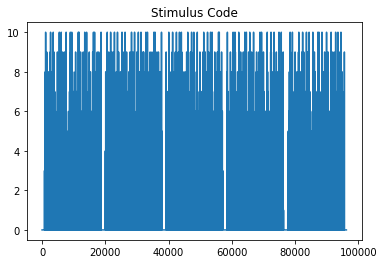

Stimulus Type =  [[0 0 0 ... 0 0 0]]


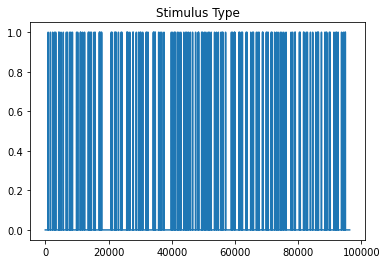

Stimulus Time =  [[ 5478  5478  5478 ... 11046 11046 11046]]


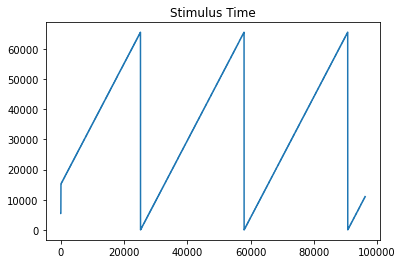

Source Time =  [[ 5509  5509  5509 ... 11077 11077 11077]]


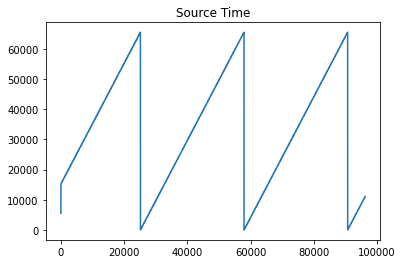

In [ ]:
print('Stimulus Code = ', my_states['StimulusCode'])
plt.title('Stimulus Code')
plt.plot(my_states['StimulusCode'][0])
plt.show()

print('Stimulus Type = ', my_states['StimulusType'])
plt.title('Stimulus Type')
plt.plot(my_states['StimulusType'][0])
plt.show()

print('Stimulus Time = ', my_states['StimulusTime'])
plt.title('Stimulus Time')
plt.plot(my_states['StimulusTime'][0])
plt.show()

#Stimulus time and Source time are different
print('Source Time = ', my_states['SourceTime'])
plt.title('Source Time')
plt.plot(my_states['SourceTime'][0])
plt.show()

In [ ]:
#creating MNE datastructures
#Creating Raw objects and info

info = mne.create_info(
    ch_names=['FP1', 'Fpz', 'FP2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'FT9', 'FT7', 
          'FC5', 'FC3', 'FC1', 'FCz', 'FC2', 'FC4', 'FC6', 'FT8', 'FT10', 'T7', 
          'C5', 'C3', 'C1', 'Cz', 'C2', 'C4', 'C6', 'T8', 'TP9', 'TP7', 
          'CP5', 'CP3', 'CP1', 'CPz', 'CP2', 'CP4', 'CP6', 'TP8', 'TP10', 'P9', 
          'P7', 'P5', 'P3', 'P1', 'Pz', 'P2', 'P4', 'P6', 'P8', 'P10', 
          'PO7', 'P05', 'P01', 'POz', 'P02', 'P06', 'PO8', 'O1', 'Oz', 'O2', 
          'O9', 'Iz', 'O10', 'NA', 'NA', 'NA', 'NA', 'NA'],
    ch_types=['eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg',
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 'eeg', 
          'eeg', 'eeg', 'eeg', 'eog', 'eog', 'eog', 'eog', 'eog'],
    sfreq=100)
print(info)
raw = mne.io.RawArray(my_signals, info)
print(raw)

<Info | 7 non-empty values
 bads: []
 ch_names: FP1, Fpz, FP2, F7, F3, Fz, F4, F8, FT9, FT7, FC5, FC3, FC1, FCz, ...
 chs: 63 EEG, 5 EOG
 custom_ref_applied: False
 highpass: 0.0 Hz
 lowpass: 50.0 Hz
 meas_date: unspecified
 nchan: 68
 projs: []
 sfreq: 100.0 Hz
>
Creating RawArray with float64 data, n_channels=68, n_times=96260
    Range : 0 ... 96259 =      0.000 ...   962.590 secs
Ready.
<RawArray | 68 x 96260 (962.6 s), ~50.1 MB, data loaded>


<ipython-input-47-0860ec85aee9>:19: RuntimeWarning: Channel names are not unique, found duplicates for: {'NA'}. Applying running numbers for duplicates.
  sfreq=100)


In [ ]:
d, t = raw[raw.ch_names.index('Cz'), :]
d.shape

(1, 96260)

In [ ]:
raw.ch_names.index('Cz')

23

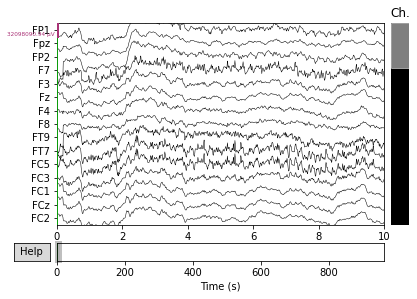

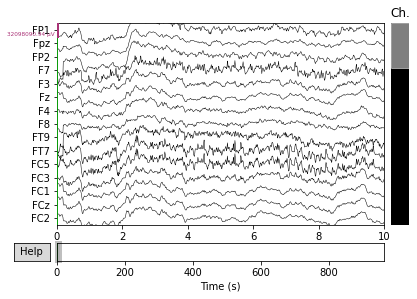

In [ ]:
raw.plot(n_channels=15, title='Data from arrays', scalings='auto', 
                show=True, block=True)

In [ ]:
#my_states = bci2kfile.states
st = my_states['StimulusType'][0]
LS = 0  #last state
isFirst = True
for i in range(len(st)):
    # print('current state = ', st[i])
    if(LS != st[i] and st[i] == 1):
        print('state change detected')
        if isFirst:
            events = np.array([i, 0, st[i]])
            isFirst = False
        else:
            events = np.vstack((events, np.array([i, 0, st[i]])))
    LS = st[i] 
#print(events)
print('Found %s events, first five:' % len(events))
print(events[:5])

state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state change detected
state chan

The event list contains three columns. The first column corresponds to sample number. To convert this to seconds, you should divide the sample number by the used sampling frequency. The second column is reserved for the old value of the trigger channel at the time of transition, but is currently not in use. The third column is the trigger id (amplitude of the pulse).

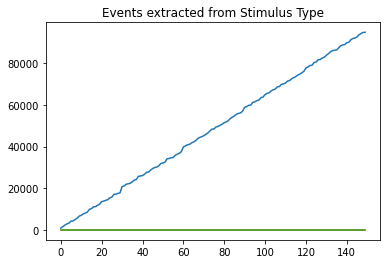

In [ ]:
plt.title('Events extracted from Stimulus Type')
plt.plot(events)

150 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated
Loading data for 150 events and 100 original time points ...
0 bad epochs dropped
Loading data for 150 events and 100 original time points ...
Loading data for 20 events and 100 original time points ...


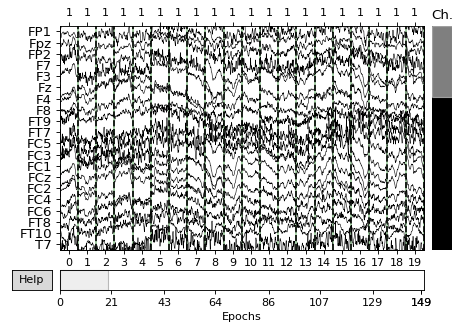

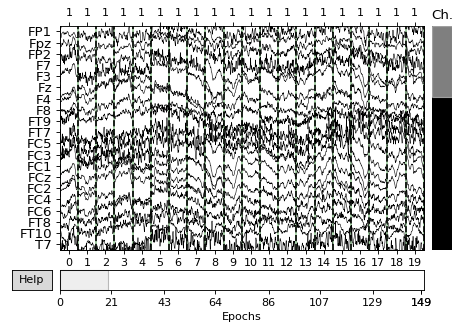

In [ ]:
# for fixed size events no start time before and after event
tmin = 0.
tmax = 0.99  # inclusive tmax, 1 second epochs

#Creating Epochs
epochs = mne.Epochs(raw, events=events, event_id= None, tmin=tmin, 
                    tmax=tmax, baseline=None, verbose=True)

#Plotting Epochs
epochs.plot(scalings='auto', show=True, block=True)

Averaging the epochs to get the evoked response

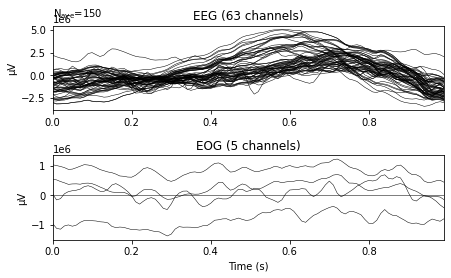

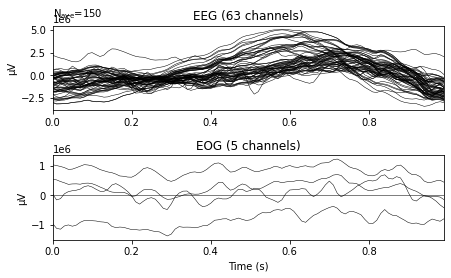

In [ ]:
# averaging the epochs to get the evoked response
picks = mne.pick_types(epochs.info, eeg=True, eog=True)
evoked = epochs.average(picks=picks)
evoked.plot(time_unit='s')

Averaging the epochs for selected channels.

Need more than one channel to make topography for eeg. Disabling interactivity.


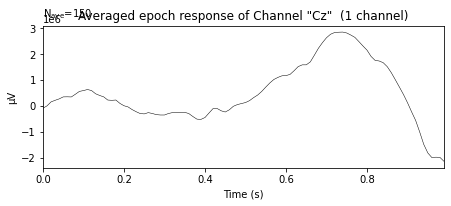

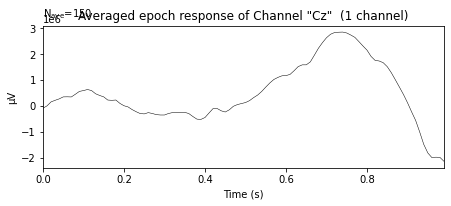

In [ ]:
# Averaging the epochs for selected channels
picks = [raw.ch_names.index(ch) for ch in ['Cz']] 
evoked = epochs.average(picks=picks)

title = 'Averaged epoch response of Channel "Cz" '
evoked.plot(titles=dict(eeg=title), time_unit='s')

Need more than one channel to make topography for eeg. Disabling interactivity.


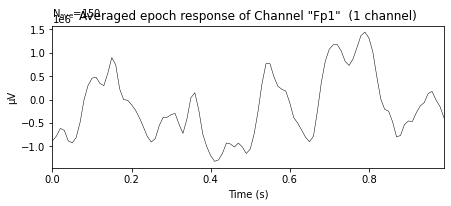

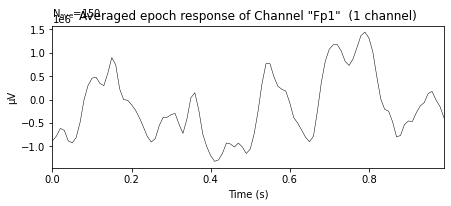

In [ ]:
#For channel FP1
picks = [raw.ch_names.index(ch) for ch in ['FP1']] 
evoked = epochs.average(picks=picks)

title = 'Averaged epoch response of Channel "Fp1" '
evoked.plot(titles=dict(eeg=title), time_unit='s')

In [ ]:
evoked.save('avg_epoch_FP1.fif')

<ipython-input-129-53e86f137048>:1: RuntimeWarning: This filename (avg_epoch_FP1.fif) does not conform to MNE naming conventions. All evoked files should end with -ave.fif, -ave.fif.gz, _ave.fif or _ave.fif.gz
  evoked.save('avg_epoch_FP1.fif')


In [ ]:
layout = mne.channels.read_layout('Vectorview-mag.lout')
layout.names = mne.utils._clean_names(layout.names, remove_whitespace=True)

fig = evoked.plot_topomap(times=np.linspace(0.05, 0.12, 5), ch_type='mag', layout=layout)

<ipython-input-125-5ae41e5d27da>:4: DeprecationWarning: Using a layout with topomaps is deprecated and will be removed in 0.21
  fig = evoked.plot_topomap(times=np.linspace(0.05, 0.12, 5), ch_type='mag', layout=layout)


RuntimeError: ignored

In [ ]:
epochs_params = dict(events = events, event_id= None, tmin=tmin, 
                     tmax=tmax, baseline=None, verbose=True)

evoked = mne.Epochs(raw, **epochs_params).average()
idx =  mne.pick_channels(evoked.info['ch_names'], ['Cz'])
new = 
idx.plot(time_unit='s')

150 matching events found
No baseline correction applied
Not setting metadata
0 projection items activated


AttributeError: ignored